In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import util

In [10]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.learning_curve import validation_curve
from sklearn.datasets import make_classification

## Read the Data

In [4]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=7, n_classes=2)

## Model Validation

* http://nbviewer.ipython.org/github/jakevdp/sklearn_pydata2015/blob/master/notebooks/05-Validation.ipynb

### Validation Curves

* plot the influence of a single hyperparameter on the training score and the validation score to find out whether the estimator is overfitting or underfitting for some hyperparameter values
    * When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.
* http://scikit-learn.org/stable/modules/learning_curve.html

In [5]:
def plot_validation_curve(param_name, param_range,
                          train_scores_mean, train_scores_std,
                          test_scores_mean, test_scores_std):
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    
    plt.legend(loc="best")    
    plt.show()
    plt.close()

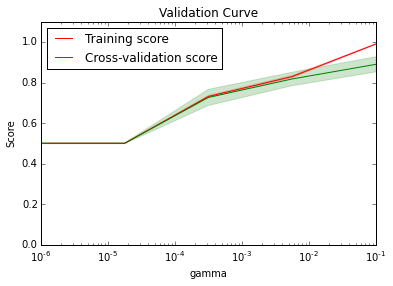

In [7]:
# SVC model, parameter is Gamma
param_range = np.logspace(-6, -1, 5)

train_scores, test_scores = validation_curve(
                            SVC(), X, y,
                            param_name="gamma", param_range=param_range,
                            cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plot_validation_curve("gamma", param_range,
                      train_scores_mean, train_scores_std,
                      test_scores_mean, test_scores_std)

In [11]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Ridge model, parameter is Alpha
param_range = np.logspace(-7, 3, 3)

train_scores, test_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=param_range)